<a href="https://colab.research.google.com/github/utyabia/1-notebook/blob/main/PyTorch_Classification_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors.
Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Import libraries
import torch
from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from torchmetrics import Accuracy

# Set random seed
random_state = 42
torch.manual_seed(random_state) # Use random_state here

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

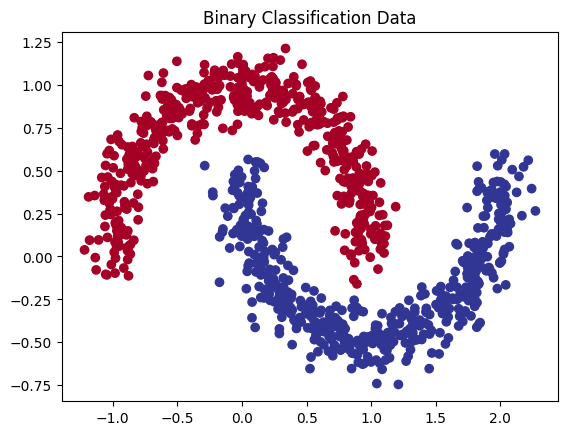

In [ ]:
# 1. Create dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=random_state) # Use random_state instead of RANDOM_SEED

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Binary Classification Data")
plt.show()

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state) # Use random_state instead of RANDOM_SEED

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

In [ ]:
# 2. Build model
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 1)

    def forward(self, x):
        return self.layer_2(torch.relu(self.layer_1(x)))

model = MoonModelV0().to(device)

3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# 3. Loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# 4. Train loop
epochs = 500
acc_fn = Accuracy(task="binary").to(device)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_preds, y_test)

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

Epoch 0 | Train Loss: 0.6672 | Train Acc: 0.56 | Test Loss: 0.6691 | Test Acc: 0.62
Epoch 50 | Train Loss: 0.4535 | Train Acc: 0.80 | Test Loss: 0.4663 | Test Acc: 0.76
Epoch 100 | Train Loss: 0.3591 | Train Acc: 0.83 | Test Loss: 0.3714 | Test Acc: 0.81
Epoch 150 | Train Loss: 0.3154 | Train Acc: 0.85 | Test Loss: 0.3237 | Test Acc: 0.83
Epoch 200 | Train Loss: 0.2870 | Train Acc: 0.87 | Test Loss: 0.2913 | Test Acc: 0.86
Epoch 250 | Train Loss: 0.2686 | Train Acc: 0.88 | Test Loss: 0.2693 | Test Acc: 0.87
Epoch 300 | Train Loss: 0.2570 | Train Acc: 0.88 | Test Loss: 0.2548 | Test Acc: 0.88
Epoch 350 | Train Loss: 0.2495 | Train Acc: 0.88 | Test Loss: 0.2451 | Test Acc: 0.88
Epoch 400 | Train Loss: 0.2447 | Train Acc: 0.88 | Test Loss: 0.2387 | Test Acc: 0.87
Epoch 450 | Train Loss: 0.2415 | Train Acc: 0.88 | Test Loss: 0.2343 | Test Acc: 0.88


5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

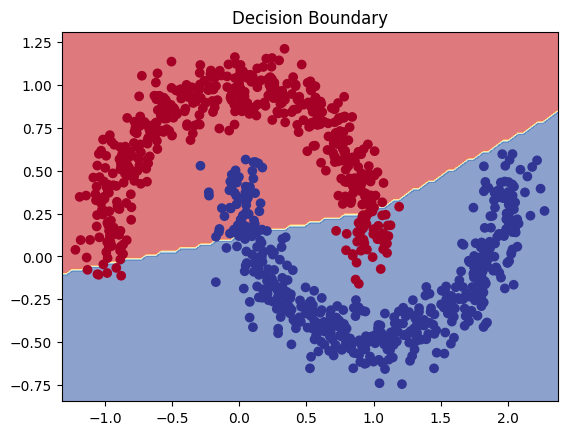

In [ ]:
# 5. Decision boundary
def plot_decision_boundary(model, X, y):
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        y_pred = torch.round(torch.sigmoid(y_logits)).reshape(xx.shape).detach().numpy()

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, torch.cat((X_train, X_test)), torch.cat((y_train, y_test)))

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

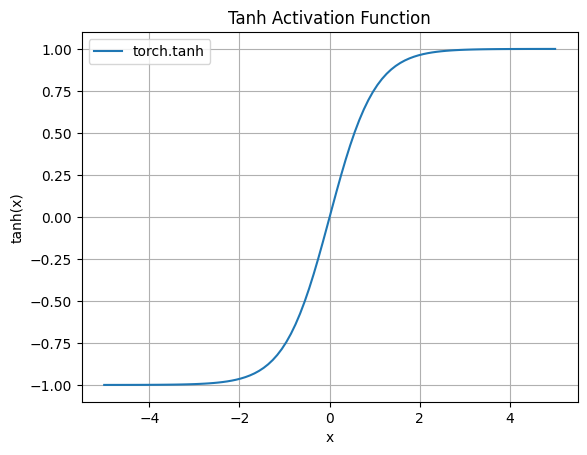

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create a straight line tensor
x = torch.linspace(-5, 5, 100)

# Apply torch.tanh
y = torch.tanh(x)

# Plot using matplotlib
plt.plot(x.numpy(), y.numpy(), label='torch.tanh')
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.legend()
plt.show()


7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

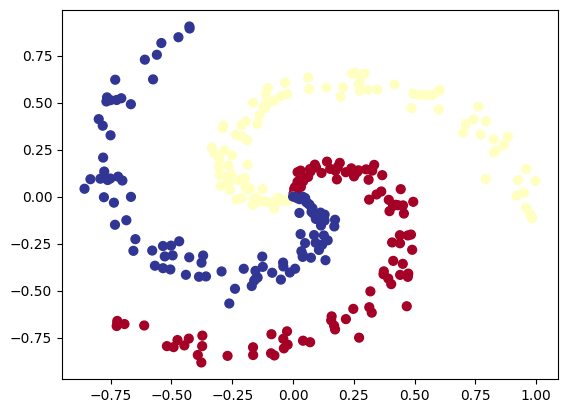

Epoch 0/1000 - Train Loss: 1.0989, Test Loss: 1.0965, Test Accuracy: 0.2667
Epoch 100/1000 - Train Loss: 0.4387, Test Loss: 0.4278, Test Accuracy: 0.8000
Epoch 200/1000 - Train Loss: 0.1659, Test Loss: 0.1462, Test Accuracy: 1.0000
Epoch 300/1000 - Train Loss: 0.0932, Test Loss: 0.0671, Test Accuracy: 1.0000
Epoch 400/1000 - Train Loss: 0.0661, Test Loss: 0.0381, Test Accuracy: 1.0000
Epoch 500/1000 - Train Loss: 0.0515, Test Loss: 0.0233, Test Accuracy: 1.0000
Epoch 600/1000 - Train Loss: 0.0417, Test Loss: 0.0139, Test Accuracy: 1.0000
Epoch 700/1000 - Train Loss: 0.0348, Test Loss: 0.0085, Test Accuracy: 1.0000
Epoch 800/1000 - Train Loss: 0.0302, Test Loss: 0.0055, Test Accuracy: 1.0000
Epoch 900/1000 - Train Loss: 0.0271, Test Loss: 0.0036, Test Accuracy: 1.0000


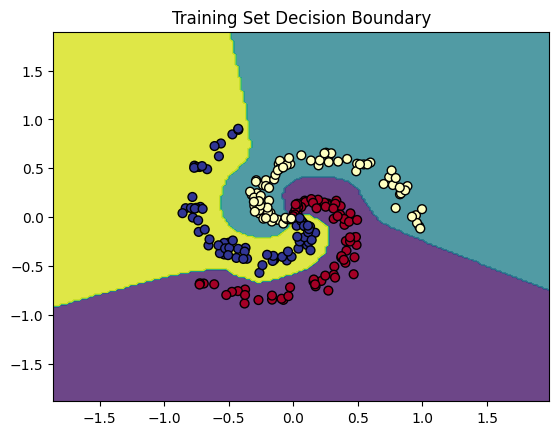

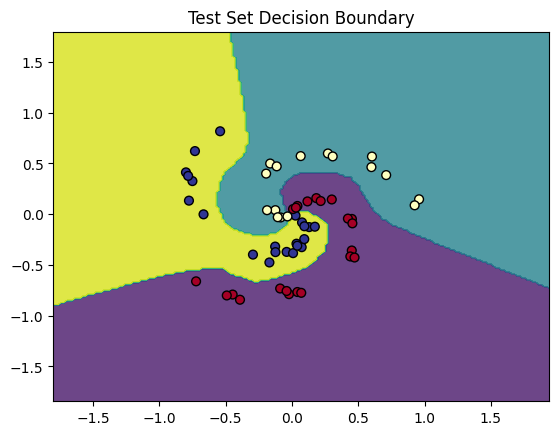

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy

# Step 1: Generate the spiral dataset
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

# Step 2: Turn data into tensors
X = torch.from_numpy(X).type(torch.float)  # features as float32
y = torch.from_numpy(y).type(torch.LongTensor)  # labels need to be of type long

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Step 3: Define the model (2 layers + ReLU)
class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.fc1 = nn.Linear(2, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.fc3 = nn.Linear(64, 3)  # Output layer (3 classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # First layer with ReLU activation
        x = torch.relu(self.fc2(x))  # Second layer with ReLU activation
        x = self.fc3(x)  # Output layer
        return x

# Instantiate model and send it to the device
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SpiralModel().to(device)

# Step 4: Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Training and testing loop
def train_and_test(model, X_train, y_train, X_test, y_test, num_epochs=1000):
    # Prepare data to be device agnostic
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)

    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()

        # Forward pass
        logits = model(X_train)
        loss = loss_fn(logits, y_train)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Testing
        model.eval()
        with torch.no_grad():
            logits_test = model(X_test)
            test_loss = loss_fn(logits_test, y_test)
            acc = acc_fn(logits_test, y_test)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{num_epochs} - Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {acc.item():.4f}")

    return model

# Train the model
model = train_and_test(model, X_train, y_train, X_test, y_test)

# Step 6: Plot decision boundaries
def plot_decision_boundary(model, X, y, plot_title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device))
    Z = torch.argmax(Z, dim=1).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
    plt.title(plot_title)
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(model, X_train.cpu().numpy(), y_train.cpu().numpy(), "Training Set Decision Boundary")

# Plot decision boundary for test set
plot_decision_boundary(model, X_test.cpu().numpy(), y_test.cpu().numpy(), "Test Set Decision Boundary")
